In [14]:
! pip install pyefd

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [9]:
image = np.load('./MNIST/test_1_28_28.npy')

In [10]:
img_example = image[1].reshape(28, 28)

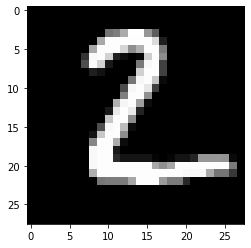

In [11]:
plt.imshow(img_example, cmap='gray')

In [12]:
cv2.imwrite('./img_example.png', img_example)

True

In [13]:
import numpy as np
import cv2

img = cv2.imread('./img_example.png')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# cv2.drawContours(img, contours, -1, (0,255,0), 3)
# cv2.imshow('img',img)

In [14]:
contours = np.vstack(contours).squeeze()

In [15]:
contours 

array([[12,  3],
       [11,  4],
       [ 9,  4],
       [ 8,  5],
       [ 8,  7],
       [ 9,  7],
       [11,  5],
       [14,  5],
       [15,  6],
       [15,  7],
       [14,  8],
       [14,  9],
       [11, 12],
       [11, 13],
       [10, 14],
       [10, 15],
       [ 8, 17],
       [ 8, 21],
       [12, 21],
       [13, 22],
       [17, 22],
       [18, 21],
       [23, 21],
       [24, 20],
       [25, 20],
       [25, 19],
       [22, 19],
       [21, 20],
       [11, 20],
       [10, 19],
       [10, 18],
       [12, 16],
       [12, 15],
       [13, 14],
       [13, 13],
       [15, 11],
       [15, 10],
       [16,  9],
       [16,  7],
       [17,  6],
       [16,  5],
       [16,  4],
       [15,  3]], dtype=int32)

In [16]:
from pyefd import elliptic_fourier_descriptors
coeffs = elliptic_fourier_descriptors(contours, order=10)

In [17]:
coeffs

array([[-2.51029817e+00, -1.99619472e+00, -8.15280353e+00,
        -3.08386404e+00],
       [ 1.83142324e+00,  3.15668449e+00, -1.17544054e+00,
        -1.67530506e+00],
       [-6.35742428e-01, -3.13208780e+00, -2.08645716e-01,
         1.17392877e+00],
       [-2.24012683e-01, -1.01336387e+00, -5.67878688e-02,
         2.72449417e-01],
       [ 4.42126421e-01, -2.79919274e-01, -3.57873109e-01,
         9.01151359e-02],
       [ 1.87659967e-01, -1.56266157e-01, -4.34131372e-01,
         1.86318231e-01],
       [ 4.72075382e-01,  1.06055871e-01, -3.53646041e-01,
        -1.28085232e-01],
       [-1.36849635e-01, -1.24905203e-01, -1.18448672e-01,
        -1.06515232e-01],
       [-8.24236259e-02,  3.12617394e-02,  8.97696473e-02,
        -1.11716365e-01],
       [ 1.30024916e-01,  5.64809205e-03, -6.40056272e-02,
        -1.94839810e-01]])

In [18]:
def plot_efd(coeffs, locus=(0.0, 0.0), image=None, contour=None, n=300):
    """Plot a ``[2 x (N / 2)]`` grid of successive truncations of the series.

    .. note::

        Requires `matplotlib <http://matplotlib.org/>`_!

    :param numpy.ndarray coeffs: ``[N x 4]`` Fourier coefficient array.
    :param list, tuple or numpy.ndarray locus:
        The :math:`A_0` and :math:`C_0` elliptic locus in [#a]_ and [#b]_.
    :param int n: Number of points to use for plotting of Fourier series.

    """
    try:
        import matplotlib.pyplot as plt
    except ImportError:
        print("Cannot plot: matplotlib was not installed.")
        return

    N = coeffs.shape[0]
    N_half = int(np.ceil(N / 2))
    n_rows = 2

    t = np.linspace(0, 1.0, n)
    xt = np.ones((n,)) * locus[0]
    yt = np.ones((n,)) * locus[1]

    for n in range(coeffs.shape[0]):
        yt += (coeffs[n, 0] * np.cos(2 * (n + 1) * np.pi * t)) + (
            coeffs[n, 1] * np.sin(2 * (n + 1) * np.pi * t)
        )
        xt += (coeffs[n, 2] * np.cos(2 * (n + 1) * np.pi * t)) + (
            coeffs[n, 3] * np.sin(2 * (n + 1) * np.pi * t)
        )
        ax = plt.subplot2grid((n_rows, N_half), (n // N_half, n % N_half))
        ax.set_title(str(n + 1))
        if contour is not None:
            ax.plot(contour[:, 1], contour[:, 0], "c--", linewidth=2)
        ax.plot(yt, xt, "r", linewidth=2)
        if image is not None:
            ax.imshow(image, plt.cm.gray)

    plt.show()

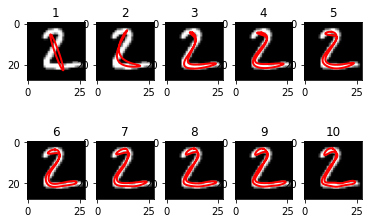

In [19]:
# from pyefd import plot_efd
plot_efd(coeffs, locus=(img_example.shape[0]/2, img_example.shape[1]/2), image = img_example)

### Play with parameters:

In [135]:
contour_2 = np.array(
    [
        [24.0, 13.0125],
        [23.0125, 0.0],
        [23.004188481675392, 15.0],
        [23.0, 15.0125],
        [22.0125, 16.0],
        [22.00313725490196, 17.0],
        [22.0, 17.004188481675392],
        [21.0, 100.004188481675392],
        [9.0125, 20.0],
        [9.006299212598424, 21.0],
        [9.006299212598424, 22.0],
        [9.0, 22.006299212598424],
        [8.9875, 22.0],
        [8.0, 21.0125],
        [7.996862745098039, 21.0],
        [7.996862745098039, 20.0],
        [8.0, 19.9875],
        [8.9875, 19.0],
        [8.9875, 18.0],
        [8.993700787401576, 17.0],
        [8.9875, 16.0],
        [8.0, 15.0125],
        [7.996862745098039, 15.0],
        [7.9875, 14.0],
        [22.0, 8.996862745098039],
        [22.006299212598424, 9.0],
        [23.0, 9.993700787401576],
        [23.006299212598424, 10.0],
        [24.0, 10.993700787401576],
        [24.00313725490196, 11.0],
        [24.00313725490196, 12.0],
        [24.00313725490196, 13.0],
        [24.0, 13.0125],
    ]
)

In [136]:
from pyefd import elliptic_fourier_descriptors
coeffs2 = elliptic_fourier_descriptors(contour_2, order=10)

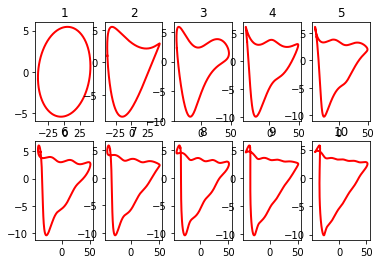

In [137]:
from pyefd import plot_efd
plot_efd(coeffs2)

### Reconstruct contour by coeffs

In [324]:
from pyefd import reconstruct_contour
reconstruct_contour(coeffs)

array([[-5.26016612e-01, -1.08320128e+01],
       [-7.72536427e-01, -1.09215611e+01],
       [-1.03208086e+00, -1.09803214e+01],
       [-1.30235815e+00, -1.10063912e+01],
       [-1.58078353e+00, -1.09985154e+01],
       [-1.86451866e+00, -1.09561663e+01],
       [-2.15051935e+00, -1.08796029e+01],
       [-2.43559012e+00, -1.07699030e+01],
       [-2.71644403e+00, -1.06289696e+01],
       [-2.98976595e+00, -1.04595083e+01],
       [-3.25227727e+00, -1.02649775e+01],
       [-3.50080006e+00, -1.00495111e+01],
       [-3.73231869e+00, -9.81781780e+00],
       [-3.94403700e+00, -9.57505813e+00],
       [-4.13342944e+00, -9.32670510e+00],
       [-4.29828451e+00, -9.07839176e+00],
       [-4.43673963e+00, -8.83575152e+00],
       [-4.54730644e+00, -8.60425650e+00],
       [-4.62888618e+00, -8.38905944e+00],
       [-4.68077517e+00, -8.19484459e+00],
       [-4.70266059e+00, -8.02569270e+00],
       [-4.69460745e+00, -7.88496470e+00],
       [-4.65703753e+00, -7.77520790e+00],
       [-4.